# Regularization

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import os

In [22]:
n = 100
c = 0.001
x1 = np.random.normal(size=n)
x2 = x1 + c*np.random.normal(size=n)
x3 = x1 - x2 + c*np.random.normal(size=n)
y = x1 + x2 + x3 + np.random.normal(size=n)
X = np.stack((x1, x2, x3), axis=1)
print("cor(x1, x2_ = ", pearsonr(x1, x2)[0])
print("cor(x3, x1-x2) = ", pearsonr(x3, x1 - x2)[0])
print("condition number of training X", np.linalg.cond(X))

cor(x1, x2_ =  0.9999995842949421
cor(x3, x1-x2) =  0.6615760036768783
condition number of training X 3082.629058048571


In [23]:
m = LinearRegression().fit(X, y)
print("lm coefficients:", m.coef_)
# penalty value
alpha=.1  # sometimes refer to this as lambda
mr = Ridge(alpha=alpha).fit(X, y)
# large alpha = large penalty
print("ridge coefficients:", mr.coef_)
ml = Lasso(alpha=alpha).fit(X, y)
print("lasso coefficients", ml.coef_)


lm coefficients: [-117.40254665  119.38890055   25.23453862]
ridge coefficients: [ 0.95391286  1.03364943 -0.0525013 ]
lasso coefficients [ 1.89207595e+00  1.53318847e-04 -0.00000000e+00]


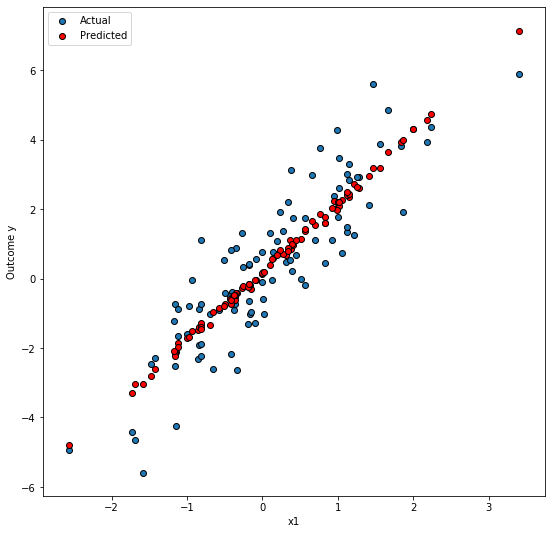

In [24]:
plt.figure(figsize=(9,9))
plt.scatter(x1, y, edgecolor='k', label='Actual')
hatY = m.predict(X)
plt.scatter(x1, hatY, c='r', edgecolor='k', label='Predicted')
plt.xlabel('x1')
plt.ylabel('Outcome y')
plt.legend()

## Create testing data

Normally you split validation data out of the original data, but as we created just random numbers, we can create some more instead.

In [25]:
nt = 1000
c = 0.001
x1t = np.random.normal(size=nt)
x2t = x1t + c*np.random.normal(size=nt)
x3t = x1t - x2t + c*np.random.normal(size=nt)
yt = x1t + x2t + x3t + np.random.normal(size=nt)
Xt = np.stack((x1t, x2t, x3t), axis=1)
print("condition number of validation X", np.linalg.cond(X))

condition number of validation X 3082.629058048571


## ... and test

In [26]:
yhat = m.predict(Xt)
rmse = np.sqrt(np.mean(yt - yhat)**2)
print("lm:", rmse)
yhatr = mr.predict(Xt)
rmser = np.sqrt(np.mean(yt - yhatr)**2)
print("ridge:", rmser)
yhatl = ml.predict(Xt)
rmsel = np.sqrt(np.mean(yt - yhatl)**2)
print("lasso:", rmsel)


lm: 0.24716655518618735
ridge: 0.25744655753278095
lasso: 0.26649255952927864


## Exercise:

1. compute the rmse-s at different lambda values.  Use a wide range of lambdas, say b/w 1e-6 to 1e6.

2. make a plot where you show how rmse depends on $\lambda$.  Note: use log scale for lambda

3. make another plot where you show how coefficients depend on $\lambda$


## Use real data

We read Boston data, but as that contains only 13 variables and causes little overfitting.  We add more variables and cut down the number of observations by taking a sample.

### First, work with unmodified Boston data

In [27]:
# Where are we?
print(os.getcwd())
boston = pd.read_csv("../data/boston.csv.bz2", sep="\t")
print(boston.shape)
print(boston.sample(4))  # just a sanity check
X = boston.drop('medv', axis=1).values
y = boston.medv.values
print("Condition number of X", np.linalg.cond(X))

/home/otoomet/tyyq/teaching/imt574/demo
(506, 14)
         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
402   9.59571   0.0  18.10     0  0.693  6.404  100.0  1.6390   24  666   
268   0.54050  20.0   3.97     0  0.575  7.470   52.6  2.8720    5  264   
495   0.17899   0.0   9.69     0  0.585  5.670   28.8  2.7986    6  391   
411  14.05070   0.0  18.10     0  0.597  6.657  100.0  1.5275   24  666   

     ptratio   black  lstat  medv  
402     20.2  376.11  20.31  12.1  
268     13.0  390.30   3.16  43.5  
495     19.2  393.29  17.60  23.1  
411     20.2   35.05  21.22  17.2  
Condition number of X 8497.93630384575


Now just do test-train split and see if we have any overfitting

RMSE on training = 4.74495011289205
RMSE on validation = 4.688500246683337


Text(0, 0.5, 'predicted MEDV')

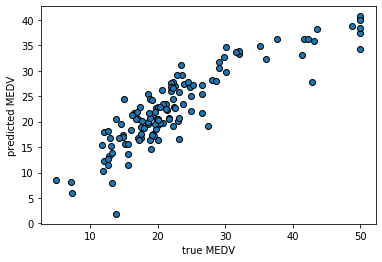

In [28]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y)
m = LinearRegression().fit(Xtrain, ytrain)
## RMSE on training
yhat = m.predict(Xtrain)
rmse = np.sqrt(np.mean((ytrain - yhat)**2))
print("RMSE on training =", rmse)
## RMSE on validation
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE on validation =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

As one can see, OLS works well and we don't see overfitting here.  The sample size is large enough (506) and we don't have many features (13)

### Next, add more collinear features

Create a large number of somewhat collinear features.  Check condition number to see how troublesome is the result

In [46]:
boston1 = pd.concat((
boston, boston.rm**2, boston.rm**3, boston.rm**4, boston.rm**5, boston.rm**6,
boston.crim**2, boston.crim**2, boston.zn**3, boston.zn**4,
boston.indus**2, boston.indus**3, boston.indus**4,
boston.crim*boston.indus, boston.crim*boston.zn, boston.crim*boston.chas,
boston.rm*boston.age, boston.rm*boston.age**2), axis=1)
boston1 = boston1.sample(100)
X = boston1.drop('medv', axis=1).values
y = boston1.medv.values
print("Condition number of X", np.linalg.cond(X))
print(boston1.head())
print("dim of extended Boston data", boston1.shape)


Condition number of X 2.953447096635867e+23
         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ...  \
345   0.03113   0.0   4.39     0  0.442  6.014  48.5  8.0136    3  352  ...   
44    0.12269   0.0   6.91     0  0.448  6.069  40.0  5.7209    3  233  ...   
403  24.80170   0.0  18.10     0  0.693  5.349  96.0  1.7028   24  666  ...   
98    0.08187   0.0   2.89     0  0.445  7.820  36.9  3.4952    2  276  ...   
343   0.02543  55.0   3.78     0  0.484  6.696  56.4  5.7321    5  370  ...   

           zn         zn     indus        indus          indus           0  \
345       0.0        0.0   19.2721    84.604519     371.413838    0.136661   
44        0.0        0.0   47.7481   329.939371    2279.881054    0.847788   
403       0.0        0.0  327.6100  5929.741000  107328.312100  448.910770   
98        0.0        0.0    8.3521    24.137569      69.757574    0.236604   
343  166375.0  9150625.0   14.2884    54.010152     204.158375    0.096125   

           1

Now the condition number is enourmous and the formula may fail.  But when it works, you may see enormous effects.

However, sklearn implements a more robust algorithm that overfits substantially less than the standard linear regression.

Pure linear regression coefficients:
 [ 5.44882024e+10  9.92314436e+07 -2.11120077e+09 -9.88349116e+10
 -2.71476147e+12  1.72377119e+14  4.37416963e+07 -9.74854760e+10
 -9.83977183e+09  8.54730357e+08 -1.02767675e+11  2.34520522e+08
  3.67043906e+09 -1.50797703e+14  5.21182103e+13 -8.86823545e+12
  7.43437980e+11 -2.45925352e+10  7.86899559e+12 -7.87075201e+12
  2.87921988e-06 -4.49577352e-08  4.78328697e-01 -2.48086580e-02
  4.13350686e-04  1.01872871e-01  2.68395406e-01 -7.69326024e+00
 -5.33997716e-02  1.50671644e-04]
sklearn estimated coefficients:
 [ 3.15025725e-01  5.19003833e-02 -2.20268843e+00  4.70464543e+00
 -1.39666640e+01 -2.08327932e+04 -2.72276234e-02 -8.28264677e-01
  6.60827967e-01 -1.96344476e-02 -5.86796590e-01 -3.75598507e-04
 -7.06639229e-01  9.89801939e+03 -2.46080599e+03  3.38089505e+02
 -2.43765176e+01  7.21718629e-01  2.05419514e-02  2.05450560e-02
 -1.76050618e-05  2.19767650e-07  3.44426160e-01 -1.78512605e-02
  2.96243981e-04 -1.05777305e-01  1.28376921e-01 -

Text(0, 0.5, 'predicted MEDV')

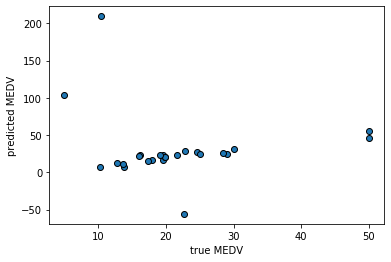

In [47]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y)
## try linear regression formula
beta = np.linalg.inv(Xtrain.T @ Xtrain) @ Xtrain.T @ ytrain
print("Pure linear regression coefficients:\n", beta)
## 
m = LinearRegression().fit(Xtrain, ytrain)
print("sklearn estimated coefficients:\n", m.coef_)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

### Use Ridge, Lasso

Ridge and lasso are designed for such cases and avoid overfitting (if the penalty parameter $\lambda$ (called `alpha` for Ridge() and Lasso()) is large enough.

RMSE = 4.0096201976812775


Text(0, 0.5, 'predicted MEDV')

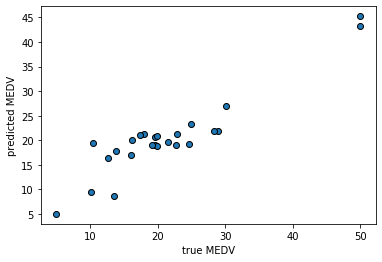

In [50]:
alpha=10000
m = Ridge(alpha=alpha).fit(Xtrain, ytrain)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

In [1]:
alpha=2000
m = Lasso(alpha=alpha).fit(Xtrain, ytrain)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

NameError: name 'Lasso' is not defined

## Exercise

* Start with small alpha (0) and increase it to a large number (1e+9 or so).
* Run both Ridge and Lasso regressions.
* At each step record RMSE, the corresponding coefficients.
* make a plot that shows how RMSE depends on $\lambda$.
* make another plot of where the coefficient value depends on alpha (see James et al, Figure 6.4 and 6.6)

Hint: use `model.coef_` to extract coefficients from the fitted model.
You can compute RMSE in the same way as done in the example.